# Practice Session 05: Hubs and authorities


<font size="+1" >Nil Tomàs Plans, U214575</font>

# 1. Read mapping of codes to country names

In [81]:
import csv
import io
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

In [82]:
# Leave this cell as-is

INPUT_NAMES_FILENAME = "trade-countries.csv"
INPUT_TRADE_OLD = "trade-2010-flows.csv"
YEAR_OLD = 2010
INPUT_TRADE_NEW = "trade-2021-flows.csv"
YEAR_NEW = 2021

In [83]:
id2name = {}
   

In [84]:
#code to read country names into id2name.
with open(INPUT_NAMES_FILENAME, "r") as input_file:
    reader = csv.DictReader(input_file, delimiter='\t')
    for record in reader:
        id2name[record["code"]] = record["name"] #associa a cada codi un país que estan en la mateixa fila

In [85]:
# LEAVE AS-IS, it should print "Germany"

print(id2name["DEU"])

Germany


# 2. Read flows data into two graphs

## 2.1. Read amount traded

In [86]:
#code to read the two graphs: gOld and gNew

#defineixo els dos grafs
gOld = nx.DiGraph()
gNew = nx.DiGraph()

#gOld
with open(INPUT_TRADE_OLD, "rt") as input_file:
    reader = csv.DictReader(input_file, delimiter='\t')
    for record in reader:
        #extrec valors de les columnes from i to i els assgno a les variables 
        from_country = record['from']
        to_country = record['to']
        amount = round(float(record["amount"]) / 1e6)  # passem el resultat en milions, dividim per 1.000.000==1e6, i arrodonim al enter més proper

        # comprovem que el país d'origen i el de destí estiguin al diccionari id2name
        if from_country in id2name and to_country in id2name:
            gOld.add_edge(from_country, to_country, weight=amount)


#gNew    
with open(INPUT_TRADE_NEW, "rt") as input_file:
    reader = csv.DictReader(input_file, delimiter='\t')
    for record in reader:
         #extrec valors de les columnes from i to i els assgno a les variables 
        from_country = record['from']
        to_country = record['to']
        amount = round(float(record["amount"]) / 1e6)# passem el resultat en milions, dividim per 1.000.000==1e6, i arrodonim al enter més proper
        
        # comprovem que el país d'origen i el de destí estiguin al diccionari id2name
        if from_country in id2name and to_country in id2name:
            gNew.add_edge(from_country, to_country, weight=amount)

In [87]:
# LEAVE AS-IS

print("The {:d} graph contains {:d} nodes".format(YEAR_OLD, gOld.number_of_nodes()))
print("The {:d} graph contains {:d} nodes".format(YEAR_NEW, gNew.number_of_nodes()))

The 2010 graph contains 33 nodes
The 2021 graph contains 33 nodes


In [88]:
# LEAVE AS-IS

for exporter in ["ESP", "PRT"]:
    for importer in ["FRA", "DEU"]:
        print("In {:d}, {:s} ({:s}) exported to {:s} ({:s}) goods and services for {:,d} USD millions".format(
            YEAR_OLD, exporter, id2name[exporter], importer, id2name[importer],
               gOld.get_edge_data(exporter, importer)["weight"]) )
        print("by {:d}, it exported {:,d} USD millions".format(YEAR_NEW, gNew.get_edge_data(exporter, importer)["weight"]))
        print("")


In 2010, ESP (Spain) exported to FRA (France) goods and services for 45,052 USD millions
by 2021, it exported 59,700 USD millions

In 2010, ESP (Spain) exported to DEU (Germany) goods and services for 25,973 USD millions
by 2021, it exported 38,352 USD millions

In 2010, PRT (Portugal) exported to FRA (France) goods and services for 5,912 USD millions
by 2021, it exported 9,871 USD millions

In 2010, PRT (Portugal) exported to DEU (Germany) goods and services for 6,412 USD millions
by 2021, it exported 8,291 USD millions



## 2.2. Compute totals

In [9]:
#code to compute totals into dictionaries exportsOld, exportsNew, importsOld, importsNew. Create a function sum_weights to avoid code duplication.

#defineixo els diccionaris
exportsOld={}
exportsNew={}
importsOld={}
importsNew={}


def sum_weights(graph, direction, weight_key="weight"):
    dic=dict((country,0) for country in id2name.keys())
    for u,v,d in graph.edges(data=True):#recorrem els nodes del graf
        if direction =="out":#si la direcció és out, estarem calculant exportacions
            dic[u]+=d[weight_key]
        elif direction =="in":#mentre's que si la direcció és in, estarem calculant importacions
            dic[v]+=d[weight_key]
    return dic

#a cada diccionari calcula la suma total de exportacions (2 primers) i importacions (últims dos) i ho guarda al propi diccionari
exportsOld = sum_weights(gOld, direction="out")
exportsNew = sum_weights(gNew, direction="out")
importsOld = sum_weights(gOld, direction="in")
importsNew = sum_weights(gNew, direction="in") 
       
        

    

In [10]:
# LEAVE AS-IS

for country in ['POL', 'ESP', 'CHL']:
    print("{:s} exported {:,d} USD Million in {:d} and {:,d} USD Million in {:d} (growth {:.1f}x),".format(
        id2name[country],
        exportsOld[country], YEAR_OLD,
        exportsNew[country], YEAR_NEW,
        exportsNew[country]/exportsOld[country]
    ))
    print(" and imported {:,d} USD Million in {:d} and {:,d} USD Million in {:d} (growth {:.1f}x).".format(
        importsOld[country], YEAR_OLD,
        importsNew[country], YEAR_NEW,
        importsNew[country]/importsOld[country]
    ))
    print()

Poland exported 128,160 USD Million in 2010 and 271,095 USD Million in 2021 (growth 2.1x),
 and imported 136,333 USD Million in 2010 and 251,993 USD Million in 2021 (growth 1.8x).

Spain exported 192,362 USD Million in 2010 and 294,287 USD Million in 2021 (growth 1.5x),
 and imported 224,917 USD Million in 2010 and 279,927 USD Million in 2021 (growth 1.2x).

Chile exported 31,615 USD Million in 2010 and 35,069 USD Million in 2021 (growth 1.1x),
 and imported 24,462 USD Million in 2010 and 35,868 USD Million in 2021 (growth 1.5x).



In [11]:
# LEAVE AS-IS

sorted_countries = sorted(id2name.keys())

flowsData = {
    'expOld': [(exportsOld[c] if c in exportsOld else 0) for c in sorted_countries],
    'impOld': [(importsOld[c] if c in importsOld else 0) for c in sorted_countries],
    'expNew': [(exportsNew[c] if c in exportsNew else 0) for c in sorted_countries], 
    'impNew': [(importsNew[c] if c in importsNew else 0) for c in sorted_countries],
}

flowsDF = pd.DataFrame(flowsData, index=sorted_countries)
flowsDF

,expOld,impOld,expNew,impNew
AUS,75635,85288,66228,98114
AUT,120131,133543,177134,173801
BEL,224624,298985,319464,363238
CAN,342352,310242,441451,387599
CHE,149601,174765,253904,262140
CHL,31615,24462,35069,35868
CZE,115923,97460,199125,151059
DEU,962139,761044,1235638,1056755
DNK,78310,66979,81521,92344
ESP,192362,224917,294287,279927


# 3. Draw the exports graphs

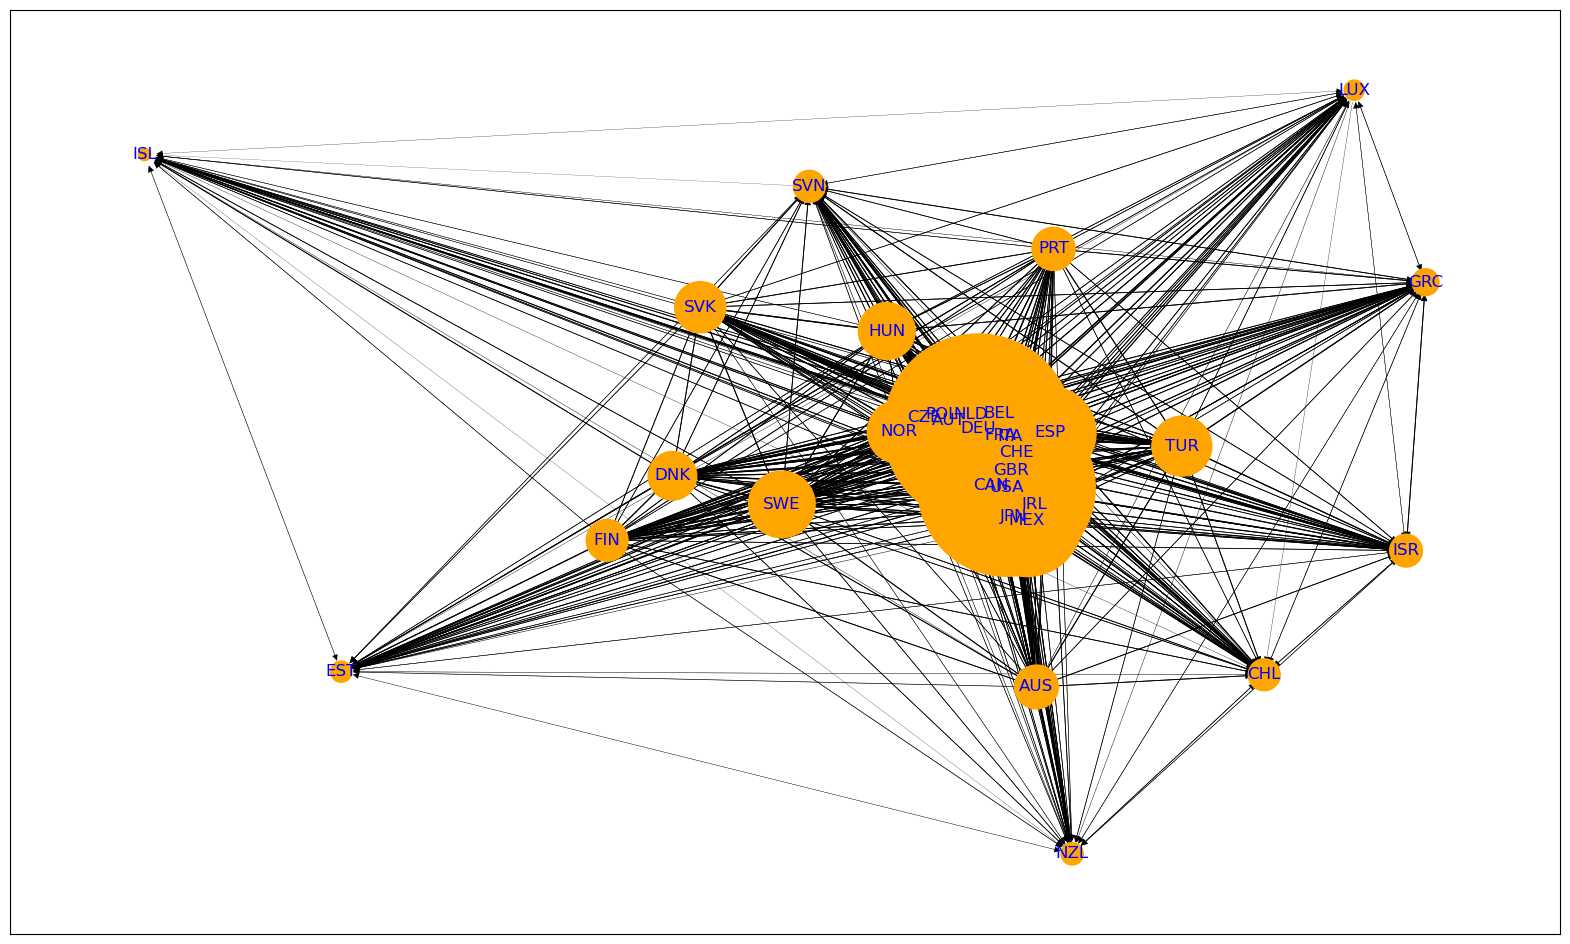

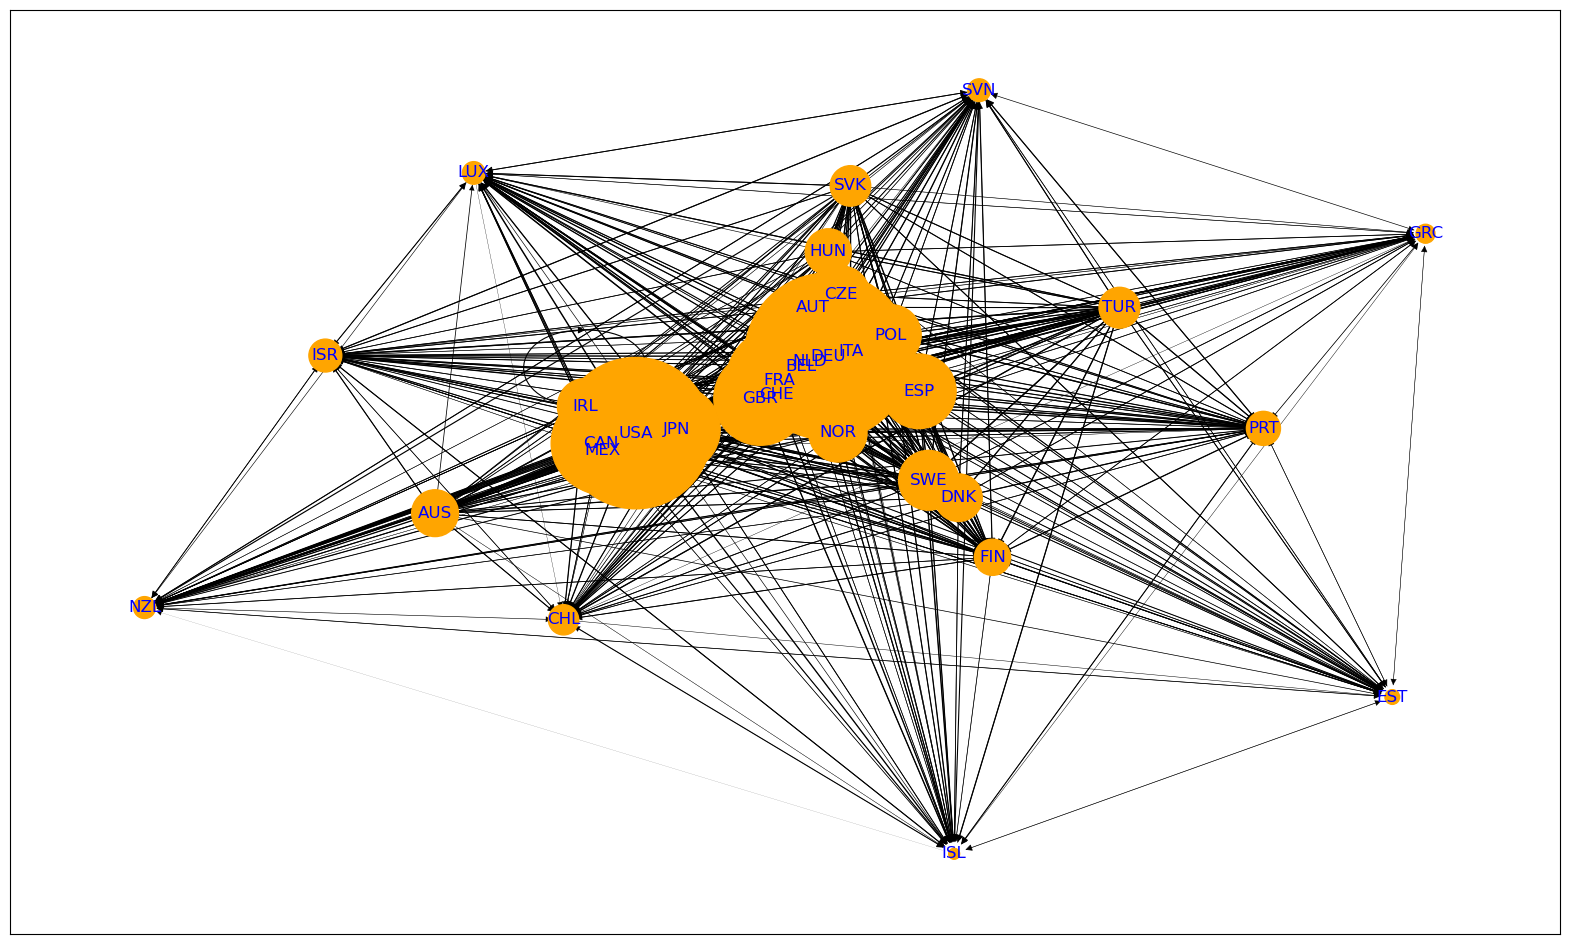

In [89]:
#escollim els dos valors per a què el graf es vegi correctament 
NODE_SIZE_MULTIPLIER=0.015
EDGE_WIDTH_MULTIPLIER=0.1

def plotGraph(graph, exports):
    plt.figure(figsize=(20,12))
    
    # Compute node sizes as a function of total exports
    node_sizes = []
    for node in graph.nodes():
        node_sizes.append(exports[node] * NODE_SIZE_MULTIPLIER)

    # Compute edge widths as a function of exports
    edge_widths = []
    for u, v, d in graph.edges(data=True):
        weight = d['weight']
        if weight > 0:# afegim condició per què si no el segon graf no l'imprimeix i retorna un error
            weight = math.log(weight) * EDGE_WIDTH_MULTIPLIER
            edge_widths.append(weight)
        
    # Determine node positions
    pos = nx.spring_layout(graph, iterations=100, weight="weight")
    
    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_color="orange", node_size=node_sizes)

    # Draw edges
    nx.draw_networkx_edges(graph, pos, width=edge_widths)

    # Draw labels and display graph
    _ = nx.draw_networkx_labels(graph, pos, font_color="blue")
    
    plt.show()
    
#imprimim els grafs
plotGraph(gNew,exportsNew)
plotGraph(gOld,exportsOld)

<font size="+1" color="blue">
1. Comentari de similituds i diferències dels grafs
D una banda, les similituds que podem observar entre els dos grafs són la centralitat dun conjunt de nodes, que són els majors exportadors.
Per tant, de forma més llunyana trobem altres nodes menors i més escampats (amb més dispersió). Alguns dels paisos en el primer graf es repeteixen 
en el segon, per exemple: USA, CAN, ESP, entre daltres.
D altra banda, la principal diferència entre els grafs, és el canvi de centralitats d alguns dels nodes, com per exemple POL (Polònia).
Una segona diferència que puc observar, és el fet que en el primer graf hi han més nodes amb alta centralitat tots junts, mentres que en el segon, els nodes
amb més centralitat estan dividits en dos grups principalment. ( El primer: MEX, USA, CAN, IRL i el segon: GBR, DEU, ESP)
2. Grup de tres paisos que estan aprop geogràficament i què també apareixen a prop al graf. Quins són aquest 3 paisos? 
Es tracta de MEX (Mèxic), USA (Estats Units) i CAN (Canadà).
</font>

# 4. Compute hubs and authorities

In [90]:
#code for function normalize
h={}#dictionary that contains hub scores
a={}#authority scores


def normalize(d):#function that sums the values of a dictionary and then divides each one by the sum
    suma=0
    N=0
    d_normalitzat={}
    for valor in d.values():
        suma+=valor
        N+=1
    if N>0:
        for key, valor in d.items():
            d_normalitzat[key]=valor/suma 
    else:# en cas que no hi hagin valors, evitem la divisió per 0
        d_normalitzat=d
    return d_normalitzat   


The following should print:
    
```python
{'a': 0.5, 'b': 0.16666666666666666, 'c': 0.3333333333333333}```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [91]:
# LEAVE AS-IS

print(normalize({"a": 39, "b": 13, "c":26}))

{'a': 0.5, 'b': 0.16666666666666666, 'c': 0.3333333333333333}


In [121]:
#code for function hubs_authorities(graph, weight_key="weight")

def hubs_authorities(graph, weight_key="weight"):
    # agafem la llista de paisos del graf i els contem
    paisos = list(graph.nodes())
    N = len(paisos)

    hub_scores = {country: 1 / N for country in paisos}#definim el hub_score en què cada country tindrà 1/N 
    authority_scores = {country: 1 for country in paisos}# i l'authority a 1

    for i in range(100):
        #inicio dos nous diccionaris temporals a cada iteració
        temp_authority_scores = {}
        temp_hub_scores = {}
    
    
        #calculem els scores AUTHORITY gràcies als hub scores
        #Compute authority scores from hub scores (weighted sum of hub scores of incoming links times edge weights)
        for country in paisos:
            auth_scores = 0 #variable per acumular el score
            for i in graph.neighbors(country):#recorrem cada veí del node
                edge_weight = graph[country][i].get(weight_key, 0)#obtenim el pes de l'enllaç entre el node actual (country i el veí i)
                #si no té pes, li donem pes=0
                auth_scores += hub_scores.get(i, 0) * edge_weight
            temp_authority_scores[country] = auth_scores

        # normalitzem els valors d'authority. 
        #Per això haurem de recorrer cada node i dividir el score del node, entre el total
        total_authority_score = sum(temp_authority_scores.values())#el total serà a suma de tots els valors
        #del diccionari de temp_authority_scores
        for country in paisos:#recorrem cada país
            authority_scores[country] = temp_authority_scores[country] / total_authority_score

            
        # calculem els scores HUBS gràcies als authority scores
        #Compute hub scores from authority scores (weighted sum of auhority scores of outgoing links times edge weights)
        for country in paisos:
            h_scores = 0 #variable per acumular el score
            for j in graph.neighbors(country):#recorrem cada veí del node
                edge_weight = graph[country][j].get(weight_key, 0)#obtenim el pes de l'enllaç entre el node actual (country i el veí j)
                #si no té pes, li donem pes=0
                h_scores += authority_scores.get(j, 0) * edge_weight
            temp_hub_scores[country] = h_scores

        # normalitzem els valors de hubs. 
        #Per això haurem de recorrer cada node i dividir el score del node, entre el total
        total_hub_score = sum(temp_hub_scores.values())#el total serà a suma de tots els valors
        #del diccionari de temp_hub_scores
        for country in paisos:#recorrem cada país
            hub_scores[country] = temp_hub_scores[country] / total_hub_score

    return hub_scores, authority_scores #retornem els scores de hub i authority
        

In [122]:
# LEAVE AS-IS
# Execution should be very fast (a few seconds maximum)

print("Computing for {:d}".format(YEAR_OLD))
(hOld,aOld) = hubs_authorities(gOld)

print("Computing for {:d}".format(YEAR_NEW))
(hNew,aNew) = hubs_authorities(gNew)

Computing for 2010
Computing for 2021


In [123]:
# LEAVE AS-IS

flowsDF['hOld'] = pd.Series(hOld)
flowsDF['aOld'] = pd.Series(aOld)
flowsDF['hNew'] = pd.Series(hNew)
flowsDF['aNew'] = pd.Series(aNew)

flowsDF

,expOld,impOld,expNew,impNew,hOld,aOld,hNew,aNew
AUS,75635,85288,66228,98114,0.011545,0.011545,0.006867,0.006867
AUT,120131,133543,177134,173801,0.019199,0.019199,0.020399,0.020399
BEL,224624,298985,319464,363238,0.033886,0.033886,0.035088,0.035088
CAN,342352,310242,441451,387599,0.109570,0.109570,0.103694,0.103694
CHE,149601,174765,253904,262140,0.026119,0.026119,0.035140,0.035140
CHL,31615,24462,35069,35868,0.005866,0.005866,0.005743,0.005743
CZE,115923,97460,199125,151059,0.016726,0.016726,0.020805,0.020805
DEU,962139,761044,1235638,1056755,0.106417,0.106417,0.103282,0.103282
DNK,78310,66979,81521,92344,0.010555,0.010555,0.007482,0.007482
ESP,192362,224917,294287,279927,0.024593,0.024593,0.026966,0.026966


In [79]:
#top 10 exportadors
top_ex = flowsDF.sort_values(by='expNew', ascending=False).head(10)

# top 10 hub score
top_hub = flowsDF.sort_values(by='hNew', ascending=False).head(10)

#imprimeix el top 10 paisos més exportadors
print("Top 10 paisos exportadors:\n",top_ex)

#imprimeix el top 10 paisos amb més hub score
print("\nTop 10 paisos per hub score:\n",top_hub)


Top 10 paisos exportadors:
      expOld   impOld   expNew   impNew      hOld      aOld      hNew      aNew
DEU  962139   761044  1235638  1056755  0.106417  0.106417  0.103282  0.103282
USA  791293  1019314  1087703  1552176  0.146355  0.146355  0.146748  0.146748
NLD  452754   321449   515568   429962  0.066399  0.066399  0.056146  0.056146
FRA  382931   472963   472845   553572  0.054751  0.054751  0.049052  0.049052
ITA  321406   298213   462666   382891  0.044329  0.044329  0.049234  0.049234
CAN  342352   310242   441451   387599  0.109570  0.109570  0.103694  0.103694
MEX  269632   209819   427071   343717  0.090220  0.090220  0.105194  0.105194
GBR  300921   429519   340783   431212  0.048749  0.048749  0.038895  0.038895
BEL  224624   298985   319464   363238  0.033886  0.033886  0.035088  0.035088
ESP  192362   224917   294287   279927  0.024593  0.024593  0.026966  0.026966

Top 10 paisos per hub score:
      expOld   impOld   expNew   impNew      hOld      aOld      hNew    

<font size="+1" color="blue">Un país amb un high total exports significa que el país produeix molts productes i és un gran exportador a nivell mundial. Mentres que tenir un higg hub score significa que moltes de les exportacions que fan els paisos passen per aquests, és a dir que seria com una espècie de intermediari.</font>

In [80]:
# top 10 imports
top_im = flowsDF.sort_values(by='impNew', ascending=False).head(10)

# top 10 authority score
top_auth = flowsDF.sort_values(by='aNew', ascending=False).head(10)

#imprimeix el top 10 paisos més importadors
print("Top 10 paisos importadors:\n",top_im)


#imprimeix el top 10 paisos amb més authority score
print("\nTop 10 paisos per authority score:\n",top_auth)

Top 10 paisos importadors:
      expOld   impOld   expNew   impNew      hOld      aOld      hNew      aNew
USA  791293  1019314  1087703  1552176  0.146355  0.146355  0.146748  0.146748
DEU  962139   761044  1235638  1056755  0.106417  0.106417  0.103282  0.103282
FRA  382931   472963   472845   553572  0.054751  0.054751  0.049052  0.049052
GBR  300921   429519   340783   431212  0.048749  0.048749  0.038895  0.038895
NLD  452754   321449   515568   429962  0.066399  0.066399  0.056146  0.056146
CAN  342352   310242   441451   387599  0.109570  0.109570  0.103694  0.103694
ITA  321406   298213   462666   382891  0.044329  0.044329  0.049234  0.049234
BEL  224624   298985   319464   363238  0.033886  0.033886  0.035088  0.035088
MEX  269632   209819   427071   343717  0.090220  0.090220  0.105194  0.105194
ESP  192362   224917   294287   279927  0.024593  0.024593  0.026966  0.026966

Top 10 paisos per authority score:
      expOld   impOld   expNew   impNew      hOld      aOld      hN

<font size="+1" color="blue">Un país amb un high total imports significa que el país importa molts productes extrangers al seu territori, mentres que un país amb un alt authority score pot tenir una gran influència en la presa de decisions sobre la direcció de les exportacions i importacions per les referències que ha tingut</font>

# 5. Comparison of hub/export, authority/import scores

In [77]:
# Funció plot_scatter

def plot_scatter(a,b,nom_x,nom_y):#definim funció plot_scatter amb els dos primers paràmetres que són els diccionaris a comparar, i els seguents dos paràmetres seran els noms dels eixos dels gràfics
    plt.figure(figsize=(20,10))
    plt.loglog()
    plt.xlabel(nom_x, {'size': '22'})
    plt.ylabel(nom_y, {'size': '22'})

    # Add a diagonal line
    plt.plot([min(a.values()),max(a.values())], [min(b.values()),max(b.values())], '-.', lw=2)

    # Do the scatter plot with texts
    for country in set(a.keys()).intersection(set(b.keys())):
        plt.text(a[country], b[country], country, {'size': '12'})# Create log-log plot


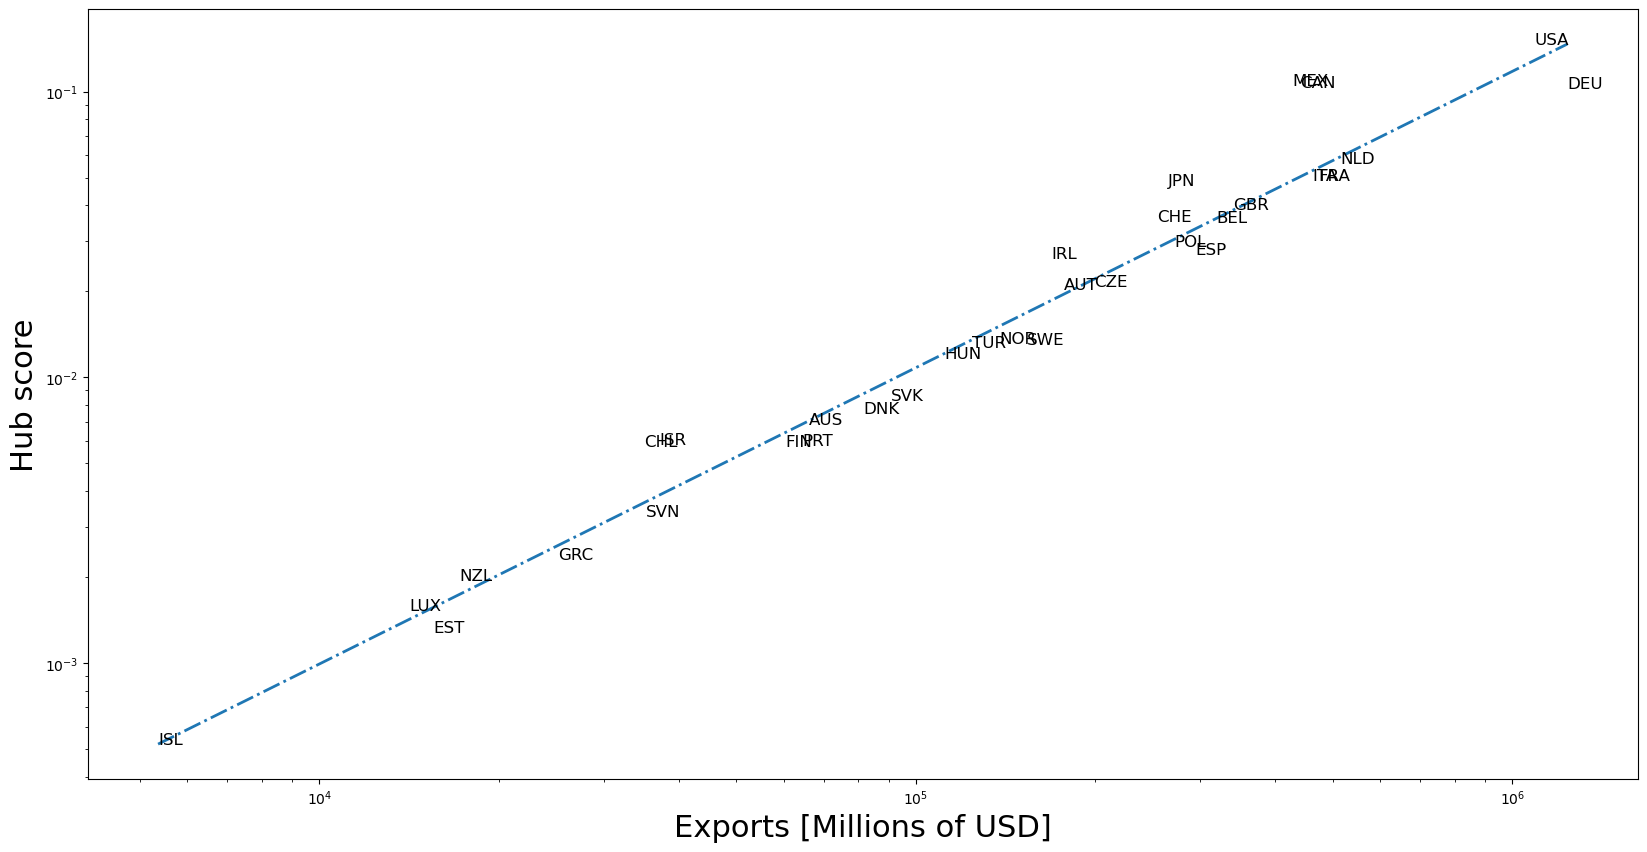

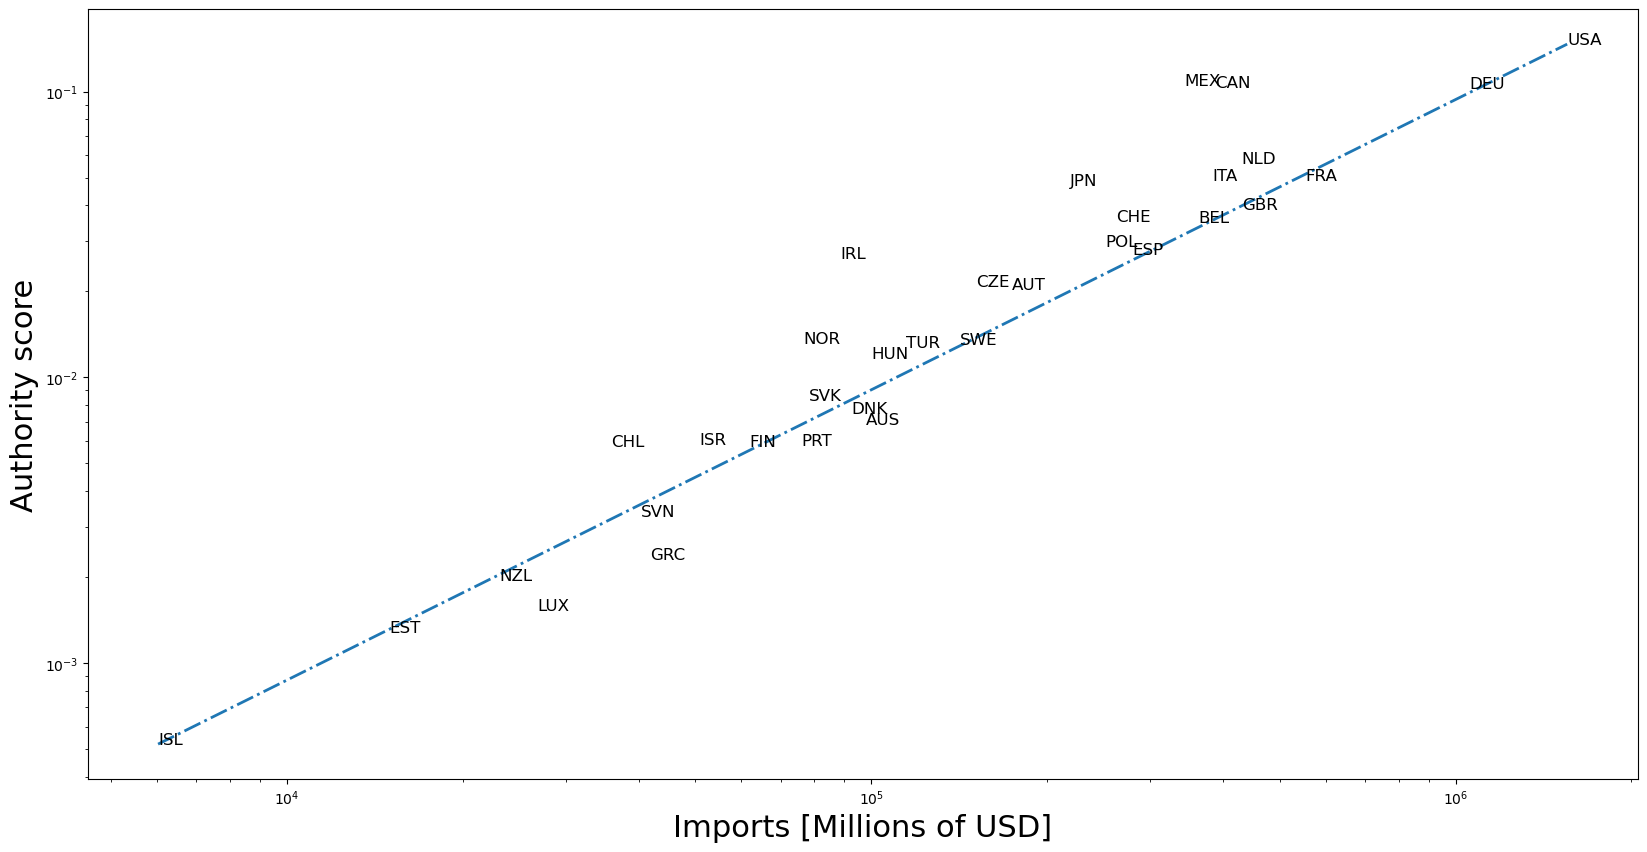

In [78]:
# LEAVE AS-IS: print plots for the newer dataset

plot_scatter( exportsNew, hNew, "Exports [Millions of USD]", "Hub score" )
plot_scatter( importsNew, aNew, "Imports [Millions of USD]", "Authority score" )

<font size="+1" color="blue">El primer ens dona la gràfica de la relació d exportacions amb hub scores, és a dir, aquells paisos que exporten més i que al mateix temps pel seu país passen més exportacions. 
En el segon podem observar la relació entre els productes importats amb l authority score, és a dir, aquells paisos que més importen amb aquells que tenen més poder de decisió per què tenen moltes bones referències </font>

# DELIVER (individually)

A .zip file containing:

* This notebook.


## Extra points available

For extra points and extra learning, export this network to .csv, export the hub scores to a separate .csv file, and import both in Cytoscape. Then, do a clustering analysis in Cytoscape, color nodes by cluster, resize nodes according to hub scores, and insert the image on this Notebook, with a brief commentary.

**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: country clusters</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>